In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
## Lee el archivo de datos y crea un dataframe con las columnas de TIMESTAMP y AirTC_Avg
df = pd.read_csv("datos.dat",sep = ",")
df["TIMESTAMP"] = pd.to_datetime(df.TIMESTAMP)

df = pd.DataFrame({"FECHA" : df["TIMESTAMP"],
                   "TEMP" : df["AirTC_Avg"]})

df["AÑO"] = df["FECHA"].dt.year
df["MES"] = df["FECHA"].dt.month
df["DIA"] = df["FECHA"].dt.day
df["HORA"] = df["FECHA"].dt.hour


df.describe()

,TEMP,AÑO,MES,DIA,HORA
count,40660.000000,40660.000000,40660.000000,40660.000000,40660.000000
mean,23.114218,2018.170708,7.413625,15.807821,11.498524
std,9.059851,0.376259,3.414580,8.759259,6.927122
min,-1.591000,2018.000000,1.000000,1.000000,0.000000
25%,15.960000,2018.000000,6.000000,8.000000,5.000000
50%,24.330000,2018.000000,8.000000,16.000000,11.000000
75%,30.090000,2018.000000,10.000000,23.000000,18.000000
max,45.370000,2019.000000,12.000000,31.000000,23.000000


In [3]:
## Calcular el promedio por hora de la temperatura

hora_anterior = 20
suma = 0
c = 0
temps = []
fecha = []
for i in range(0,len(df)):
    if(df["HORA"][i] == hora_anterior):
        suma = suma + df["TEMP"][i]
        hora_anterior = df["HORA"][i]
        c = c+1
    else:
        temps.append(suma/c)
        fecha.append(df["FECHA"][i])
        suma = df["TEMP"][i]
        hora_anterior = df["HORA"][i]
        c = 1
temps.append(suma/c)
fecha.append(df["FECHA"][i])


In [4]:
## Creo un data frame con los promedios
df2 = pd.DataFrame({"FECHA" : fecha,
                    "TEMP" : temps})
df2["FECHA"] = pd.to_datetime(df2.FECHA)
df2["AÑO"] = df2["FECHA"].dt.year
df2["MES"] = df2["FECHA"].dt.month
df2["DIA"] = df2["FECHA"].dt.day
df2.head()

,FECHA,TEMP,AÑO,MES,DIA
0,2018-05-11 21:00:00,22.810000,2018,5,11
1,2018-05-11 22:00:00,21.876667,2018,5,11
2,2018-05-11 23:00:00,18.386667,2018,5,11
3,2018-05-12 00:00:00,17.540000,2018,5,12
4,2018-05-12 01:00:00,16.561667,2018,5,12


In [14]:
## Obtiene la unidad de frio acumulada en un dia (UF24) comenzando en el 01 de noviembre
## Ademas obtiene la temperatura maxima y minima de cada dia
suma = 0
sumas = []
fechas2 = []
tmax = -1000
tmin =  1000
tmaxs = []
tmins = []
for i in range(df2["AÑO"][0],df2["AÑO"][len(df2)-1]+1):
    dfnen = df2[df2["AÑO"] == i]
    for j in range(dfnen["MES"][dfnen.index[0]],dfnen["MES"][dfnen.index[len(dfnen)-1]]+1):
        if(j < 11 and i == 2018):
            continue
        else:
            dfmes = dfnen[dfnen["MES"] == j]
        for k in range(dfmes["DIA"][dfmes.index[0]],dfmes["DIA"][dfmes.index[len(dfmes)-1]]+1):
            dfdia = dfmes[dfmes["DIA"] == k]
            for n in dfdia.index:
                if(dfdia["TEMP"][n] > tmax):
                    tmax = dfdia["TEMP"][n]
                if(dfdia["TEMP"][n] < tmin):
                    tmin = dfdia["TEMP"][n]
                if(dfdia["TEMP"][n] < 1.5):
                    continue
                elif(dfdia["TEMP"][n] >= 1.5  and dfdia["TEMP"][n] < 2.5):
                    suma = suma + 0.5
                elif(dfdia["TEMP"][n] >= 2.5  and dfdia["TEMP"][n] < 9.2):
                    suma = suma + 1.0
                elif(dfdia["TEMP"][n] >= 9.2  and dfdia["TEMP"][n] < 12.5):
                    suma = suma + 0.5
                elif(dfdia["TEMP"][n] >= 12.5 and dfdia["TEMP"][n] < 16):
                    continue
                elif(dfdia["TEMP"][n] >= 16   and dfdia["TEMP"][n] < 18):
                    suma = suma - 0.5
                else:
                    suma = suma - 1.0
            fechas2.append(str(i) + " " + str(j) + " " + str(k))
            sumas.append(suma)
            suma = 0
            
            tmaxs.append(tmax)
            tmins.append(tmin)
            tmax = -1000
            tmin =  1000

In [15]:
## Crea el dataframe con las columnas de las unidades de frio acumuladas en las 24 horas.
UF24 = pd.DataFrame({"FECHA" : fechas2,
                     "Unidad Frio" : sumas,
                     "TMAX" : tmaxs,
                     "TMIN" : tmins})
UF24["FECHA"] = pd.to_datetime(UF24.FECHA)


In [16]:
UF24.head()

,FECHA,TMAX,TMIN,Unidad Frio
0,2018-11-01,28.621667,6.806833,-0.5
1,2018-11-02,30.960000,10.248333,-8.5
2,2018-11-03,29.998333,10.473333,-9.0
3,2018-11-04,31.243333,11.670000,-11.5
4,2018-11-05,31.093333,11.435000,-8.5


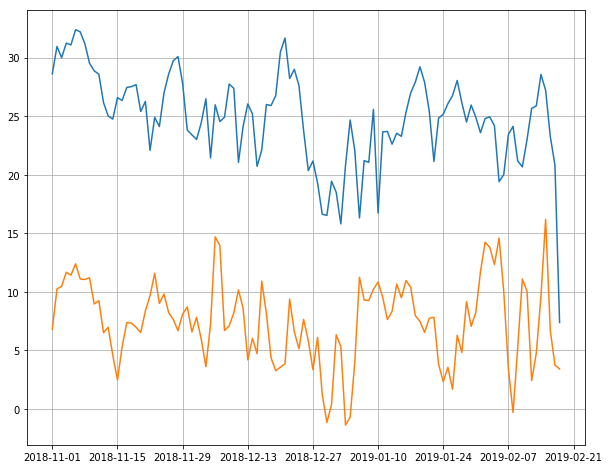

In [26]:
## Gráfica de la temperatura maxima y minima en una sola.
grupo = UF24[["TMAX","TMIN"]]
plt.figure(figsize = (10,8))
plt.plot(UF24["FECHA"],grupo)
plt.grid()
plt.show()

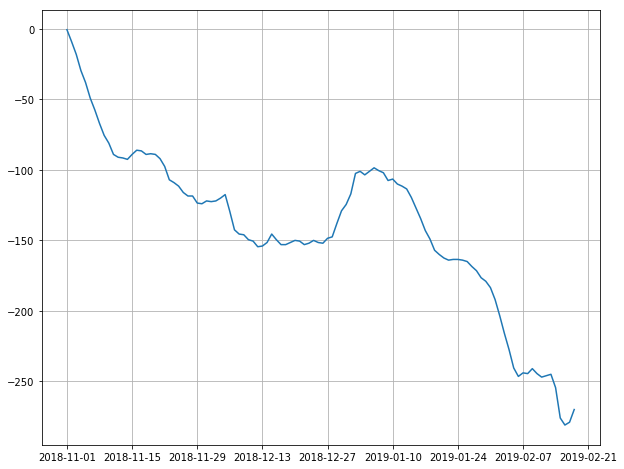

In [42]:
## gráfica de la acumulación de horas frío (suma de UF24). 
plt.figure(figsize = (10,8))
plt.plot(UF24["FECHA"],UF24["Unidad Frio"].cumsum())
plt.grid()
plt.show()